In [1]:
%load_ext autoreload
%autoreload 2
from system.bio_model.cognitive_map import LifelongCognitiveMap
import system.plotting.plotResults as plot
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Displaying different maps

In [3]:
def draw_map(file, env_model):
    cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=file, debug=False)
    print(f"{file} ({len(cognitive_map.node_network.nodes)} nodes)")
    plot.plotTrajectoryInEnvironment(env_model=env_model, cognitive_map=cognitive_map, trajectory=False)

final_layout.after_exploration.gpickle (89 nodes)


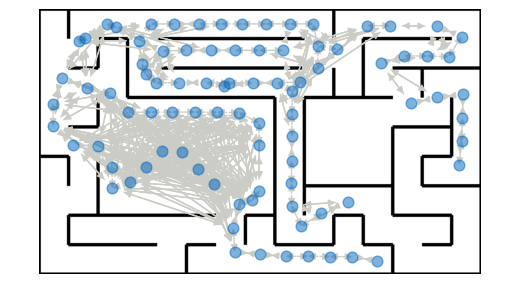

In [5]:
draw_map("final_layout.after_exploration.gpickle", "final_layout")

In [ ]:
import os

for filename in os.listdir("../system/bio_model/data/cognitive_map/artifacts"):
    if filename.startswith('connect_reachability_network+spikings+lidar--raw_lidar+noimages+conv.25') and filename.endswith('.gpickle'):
        draw_map('artifacts/'+filename, 'Savinov_val3')

###### All maps

In [ ]:
import os
for filename in os.listdir("../system/bio_model/data/cognitive_map"):
    match filename.split("."):
        case (env_model, _type, "gpickle"):
            draw_map(filename, env_model)
        case (type, "gpickle"):
            draw_map(filename, "Savinov_val3")

In [9]:
map_file = "after_exploration.gpickle"
map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=map_file, debug=True)
map.

AttributeError: 'LifelongCognitiveMap' object has no attribute 'show'

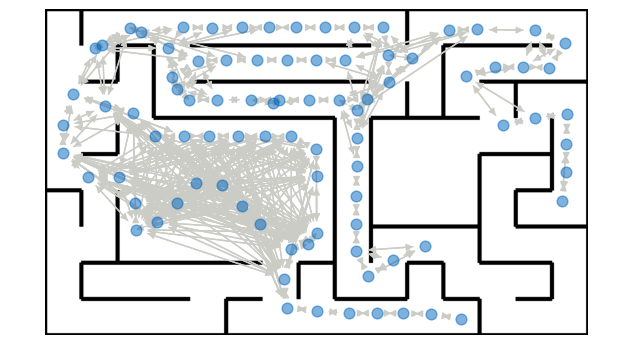

In [17]:
from system.plotting.plotHelper import environment_plot, add_environment

file = "final_layout.after_exploration.gpickle"

fig, ax = plt.subplots()
cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=file, debug=False)
add_environment(ax, 'final_layout')
plot.plotCognitiveMap(ax, cognitive_map)
fig.tight_layout()
fig.savefig('../../report/figures/maps/final_map.png')

## Computing grid cell drift

In [ ]:
from system.controller.simulation.pybullet_environment import PybulletEnvironment
from system.controller.local_controller.local_navigation import setup_gc_network

map_file = 'after_exploration.gpickle'
cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=map_file)
with PybulletEnvironment(env_model="linear_sunburst") as env:
    gc_network = setup_gc_network(env.dt)
    cognitive_map.test_place_cell_network(env, gc_network)

## Getting reachability from map nodes

In [2]:
map_file = "linear_sunburst.after_lifelong_learning.gpickle"
cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=map_file, debug=False)

In [8]:
import networkx as nx

node_network = cognitive_map.node_network
positions = { node: nodeval['pos'] for node, nodeval in node_network.nodes.items() }

def draw_network_with_re(re):
    fig, axes = plt.subplots(1, 2)
    reachabilities = []
    for start, end in node_network.edges:
        reachabilities.append(re.reachability_factor(start, end))
    reachabilities_binary = [ (0, 0.5, 0) if edge > re.threshold_reachable else (1, 0.5, 0.5) for edge in reachabilities ]
    nx.draw_networkx(node_network, node_size=120, with_labels=False, pos=positions, edge_color=reachabilities, ax=axes[0])
    nx.draw_networkx(node_network, node_size=120, with_labels=False, pos=positions, edge_color=reachabilities_binary, ax=axes[1])
    plt.show()

from system.controller.reachability_estimator.reachability_estimation import reachability_estimator_factory

##### Spikings

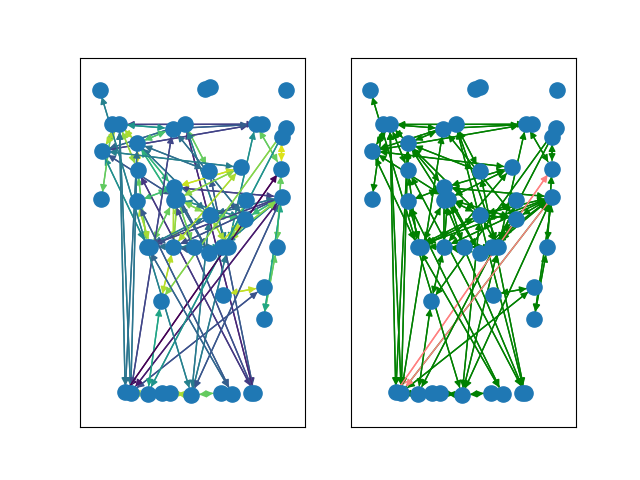

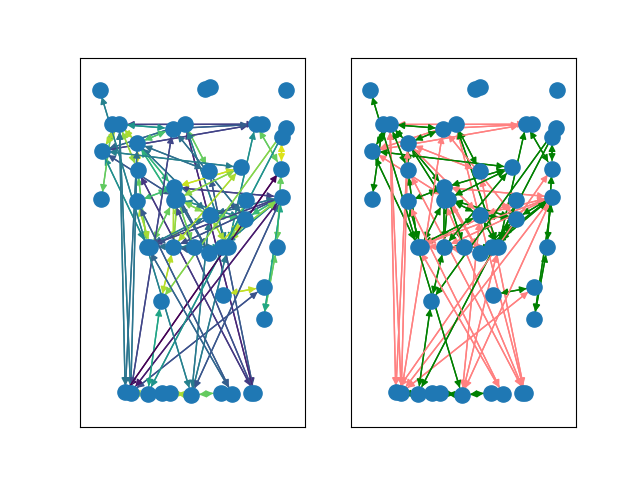

In [9]:
re = reachability_estimator_factory('spikings')
draw_network_with_re(re)
re.threshold_reachable = 0.6
draw_network_with_re(re)

##### View_overlap

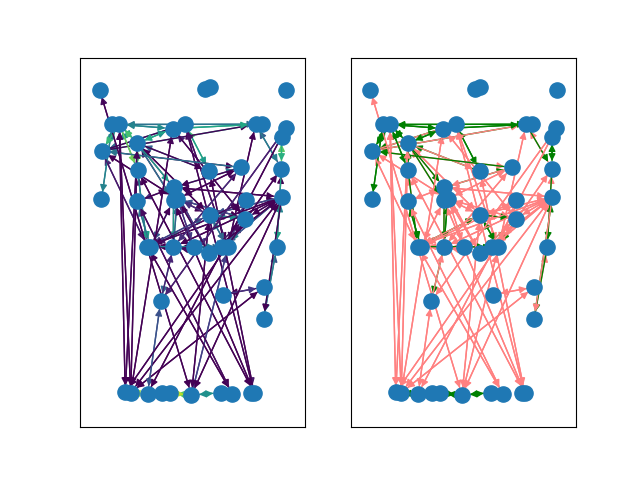

In [10]:
draw_network_with_re(reachability_estimator_factory('view_overlap', env_model='linear_sunburst'))

###### Checking why the ViewOverlap controller doesn't work

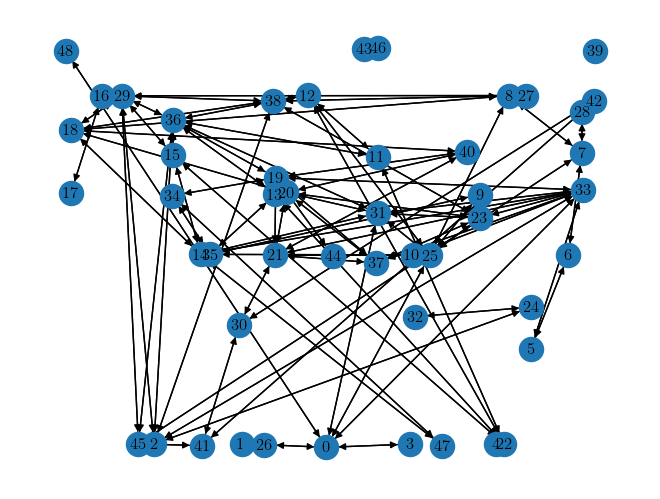

    def reachability_factor(self, start: PlaceInfo, goal: PlaceInfo) -> float:
        """ Reachability Score based on the view overlap of start and goal in the environment """
        # untested and unfinished
        start_pos = start.pos
        goal_pos = goal.pos

        heading1 = np.degrees(np.arctan2(goal_pos[0] - start_pos[0], goal_pos[1] - start_pos[1]))

        overlap_ratios = self.map_layout.view_overlap(start_pos, heading1, goal_pos, heading1, self.fov, mode='plane')

        return (overlap_ratios[0] + overlap_ratios[1]) / 2


In [8]:
re = reachability_estimator_factory('view_overlap', env_model='linear_sunburst')
%psource re.reachability_factor
nodes = list(node_network.nodes)
cognitive_map.draw()

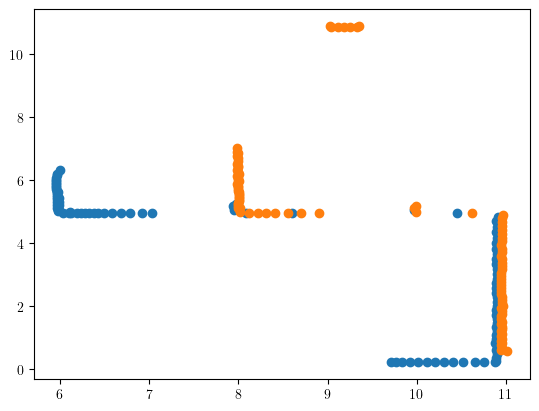

88.21659538329148 (0.36, 0.67)


In [9]:
import numpy as np
start, goal = nodes[0], nodes[3]
start_pos = start.pos
goal_pos = goal.pos

heading1 = np.degrees(np.arctan2(goal_pos[0] - start_pos[0], goal_pos[1] - start_pos[1]))
overlap_ratios = re.map_layout.view_overlap(start_pos, heading1, goal_pos, heading1, re.fov, mode='plane', vis=True)
print(heading1, overlap_ratios)

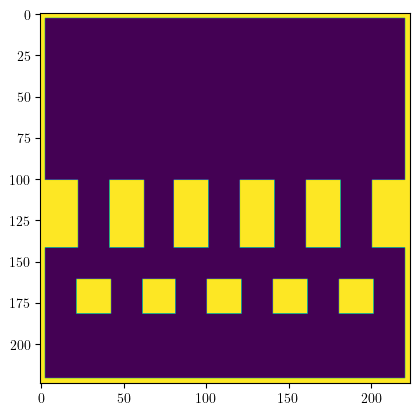

In [10]:
import matplotlib.pyplot as plt
plt.imshow(re.map_layout.binary_occupancy)

##### Network

In [26]:
!ls ../system/controller/reachability_estimator/data/models/

autoencoder0.25
autoencoder100.25
autoencoder1.25
autoencoder16.25
autoencoder20.25
autoencoder4.25
autoencoder50.10
autoencoder50.15
autoencoder50.20
autoencoder50.25
autoencoder50.5
autoencoder80.10
autoencoder80.15
autoencoder80.20
autoencoder80.25
autoencoder80.5
no_siamese_mse_updated.10
no_siamese_mse_updated.15
no_siamese_mse_updated.5
reachability_network-260624-3colors+lidar--ego_bc.25
reachability_network-260624-3colors+spikings+lidar--raw_lidar+conv.25
reachability_network-260624-boolor+spikings+lidar--raw_lidar+conv.25
reachability_network-260624+dist.25
reachability_network-260624+lidar--raw_lidar+conv.25
reachability_network-260624+spikings+conv.25
reachability_network-260624+spikings+lidar--allo_bc+conv.25
reachability_network-260624+spikings+lidar--ego_bc+conv.25
reachability_network-260624+spikings+lidar--raw_lidar.25
reachability_network-260624+spikings+lidar--raw_lidar+conv.25
reachability_network-260624+spikings+lidar--raw_lidar+dist+conv.25
reachability_network-260

[W NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.


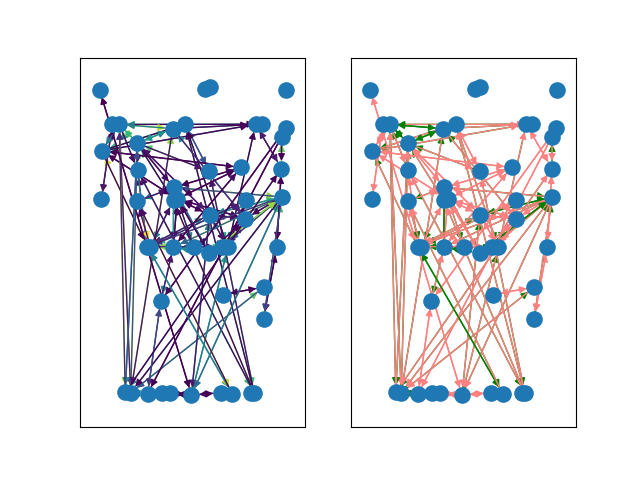

In [11]:
from system.controller.reachability_estimator.ReachabilityDataset import SampleConfig

draw_network_with_re(reachability_estimator_factory(
    'neural_network',
    weights_file='re_mse_weights.50',
    config=SampleConfig(grid_cell_spikings=True)
))

2024-07-26 19:02:13.851319: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


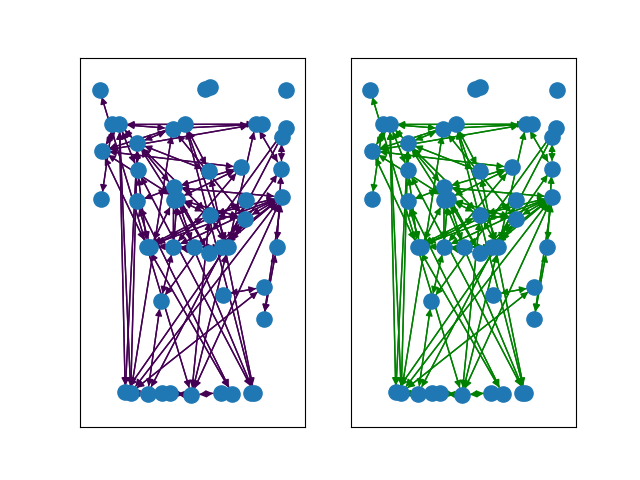

In [13]:
from system.controller.reachability_estimator.training.train_multiframe_dst import Hyperparameters

draw_network_with_re(reachability_estimator_factory(
    'neural_network',
    weights_file='reachability_network-260624+spikings+conv.25',
    config=SampleConfig(grid_cell_spikings=True),
    backbone_classname='convolutional',
))

### Checking where that reachability comes from

In [3]:
re.threshold_reachable

0.3

In [4]:
nodes = list(cognitive_map.node_network.nodes)
def get_factor(i, j):
    (node_i, node_j) = (nodes[x] for x in (i, j))
    re_factor = re.reachability_factor(node_i, node_j)
    try:
        saved_factor = cognitive_map.node_network.edges[node_i, node_j]['connectivity_probability']
    except KeyError:
        saved_factor = None
    return re_factor, saved_factor
get_factor(0, 1)

(0.7150000000000001, 0.7150000000000001)

In [6]:
from itertools import pairwise
for i, j in pairwise(range(len(nodes))):
    print(f'[{i}] -> [{j}]:', get_factor(i, j), get_factor(j, i))

[0] -> [1]: (0.7150000000000001, 0.7150000000000001) (0.7849999999999999, 0.7150000000000001)
[1] -> [2]: (0.75, 0.75) (0.75, 0.75)
[2] -> [3]: (0.745, 0.745) (0.775, 0.745)
[3] -> [4]: (0.635, 0.635) (0.815, 0.635)
[4] -> [5]: (0.7050000000000001, 0.7050000000000001) (0.69, 0.7050000000000001)
[5] -> [6]: (0.7849999999999999, 0.7849999999999999) (0.76, 0.7849999999999999)
[6] -> [7]: (0.77, 0.77) (0.71, 0.77)
[7] -> [8]: (0.36, 0.36) (0.66, 0.36)
[8] -> [9]: (0.59, 0.59) (0.515, 0.59)
[9] -> [10]: (0.36, 0.36) (0.435, 0.36)
[10] -> [11]: (0.305, 0.305) (0.27, 0.305)
[11] -> [12]: (0.0, None) (0.025, None)
[12] -> [13]: (0.62, 0.62) (0.445, 0.62)
[13] -> [14]: (0.505, 0.505) (0.22, 0.505)
[14] -> [15]: (0.66, 0.66) (0.195, 0.66)
[15] -> [16]: (0.42, 0.42) (0.43500000000000005, 0.42)
[16] -> [17]: (0.6950000000000001, 0.6950000000000001) (0.3, 0.6950000000000001)
[17] -> [18]: (0.32, 0.32) (0.505, 0.32)
[18] -> [19]: (0.61, 0.61) (0.56, 0.61)
[19] -> [20]: (0.47, 0.47) (0.61, 0.47)
[20]

#### Some more stats
to debug if the reachability does not make sense

In [17]:
import numpy as np
from system.controller.reachability_estimator.types import PlaceInfo
for i, j in pairwise(range(18)):
    node_i, node_j = nodes[i], nodes[j]
    middle = (node_i.pos + node_j.pos) / 2
    node_ij = PlaceInfo(pos=middle, angle=0, lidar=None, img=None, spikings=None)
    print(f'[{i}] -({re.reachability_factor(node_i, node_ij)})> [{i}.5] -({re.reachability_factor(node_ij, node_j)})> [{j}]')

[0] -(-0.8302635584928693)> [0.5] -(-0.8302635584928697)> [1]
[1] -(-0.8568140175843595)> [1.5] -(-0.8568140175843598)> [2]
[2] -(-2.501533277732558)> [2.5] -(-2.501533277732558)> [3]
[3] -(-0.8467862963514505)> [3.5] -(-0.8467862963514505)> [4]
[4] -(-0.827746202734712)> [4.5] -(-0.827746202734712)> [5]
[5] -(-0.8223541891237505)> [5.5] -(-0.8223541891237497)> [6]
[6] -(-0.8186241225164983)> [6.5] -(-0.8186241225164983)> [7]
[7] -(-0.8473762745932515)> [7.5] -(-0.8473762745932509)> [8]
[8] -(-0.829908450745501)> [8.5] -(-0.8299084507455005)> [9]
[9] -(-0.8125709565277949)> [9.5] -(-0.8125709565277955)> [10]
[10] -(-0.8464369468644735)> [10.5] -(-0.8464369468644719)> [11]
[11] -(-0.8358955536418636)> [11.5] -(-0.835895553641863)> [12]
[12] -(-0.8446180989758892)> [12.5] -(-0.8446180989758892)> [13]
[13] -(-0.8711103234405992)> [13.5] -(-0.8711103234405992)> [14]
[14] -(-0.8279291257838153)> [14.5] -(-0.8279291257838153)> [15]
[15] -(-0.8419868739424984)> [15.5] -(-0.8419868739424973)> 

# Merging maps

In [2]:
map_files = "cognitive_map_partial", "cognitive_map_partial_3"
map_files = [ file + ".gpickle" for file in map_files ]
maps = [ LifelongCognitiveMap(reachability_estimator=None, load_data_from=map_file, debug=False) for map_file in map_files ]

In [3]:
for i, map in enumerate(maps):
    print("Edge for map", i)
    edge = next(iter(map.node_network.edges))
    print(map.node_network.edges[edge])

Edge for map 0
{'weight': 0.0574221613648944, 'connectivity_probability': 0.95, 'mu': 0.05960367940133437, 'sigma': 0.005669467095138408}
Edge for map 1
{'weight': 0.1723835877321686, 'connectivity_probability': 0.9377825618945104, 'mu': 0.16670678766968194, 'sigma': 0.008660254037844387, 'length': 107}


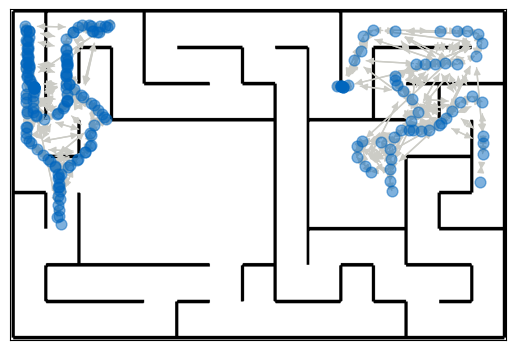

In [10]:
import networkx
new_map = LifelongCognitiveMap(reachability_estimator=None, debug=False)
new_graph = new_map.node_network
for map in maps:
    for node in map.node_network:
        new_graph.add_node(node, pos=node.pos)
    new_graph.add_edges_from(((*edge_start_and_end, edge) for (edge_start_and_end, edge) in map.node_network.edges.items()))
plot.plotTrajectoryInEnvironment(env_model="Savinov_val3", cognitive_map=new_map, trajectory=False)

In [12]:
new_map.save("disjoint.gpickle")

In [12]:
from system.controller.reachability_estimator.reachability_estimation import reachability_estimator_factory
from cogmap_utils import add_connections_to_map

# Add connections to an existing map

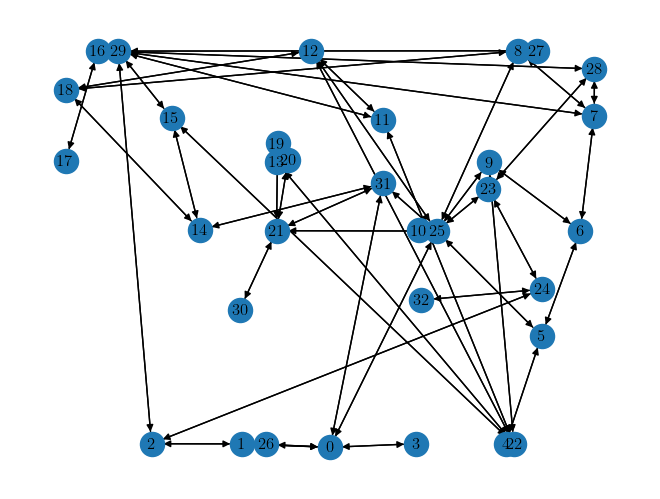

In [4]:
cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from='linear_sunburst.after_lifelong_learning.gpickle')
node_network = cognitive_map.node_network

In [1]:
from system.controller.reachability_estimator.reachability_estimation import reachability_estimator_factory
from cogmap_utils import add_connections_to_map

In [ ]:
re = reachability_estimator_factory('distance')
re.threshold_reachable = -2

add_connections_to_map(cognitive_map, re)

cognitive_map.draw()

In [5]:
cognitive_map.save('linear_sunburst.after_exploration.gpickle', absolute_path=False)

# Adding nodes and edges to a map

In [4]:
#cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from='linear_sunburst.after_exploration.gpickle')
cognitive_map = LifelongCognitiveMap(reachability_estimator=None)
node_network = cognitive_map.node_network

In [9]:
plt.switch_backend('qt5agg')
plot.plotTrajectoryInEnvironment(env_model='tmp', cognitive_map=cognitive_map, trajectory=False)

clicks = []
while True:
    click = plt.ginput()
    if not click:
        break
    plt.plot(click[0][0], click[0][1], 'ro')
    clicks += click
clicks

[(0.6717207792207793, 1.1925487012987013),
 (1.7360876623376627, 0.8148701298701301),
 (1.701753246753247, 0.15107142857142852),
 (2.594448051948053, 1.3527759740259744),
 (3.567256493506494, 1.6961201298701298),
 (3.5100324675324686, 2.634594155844156),
 (4.631623376623378, 2.7032629870129874),
 (2.5601136363636368, 2.7147077922077925),
 (2.7203409090909094, 3.6302922077922086),
 (4.19672077922078, 3.676071428571429),
 (0.9006168831168833, 3.5501785714285723),
 (4.551509740259742, 1.3413311688311689),
 (4.288279220779222, 0.5287500000000002),
 (4.128051948051949, 0.116737012987013),
 (3.0293506493506497, 0.12818181818181817),
 (2.5486688311688317, 0.116737012987013),
 (2.9835714285714294, 1.158214285714286),
 (0.9006168831168833, 1.0666558441558442),
 (0.9006168831168833, 1.0666558441558442)]

/tmp/ipykernel_40444/3937653722.py:1: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  plt.switch_backend('inline')
pybullet build time: Apr 30 2024 14:40:07
/tmp/ipykernel_40444/3937653722.py:8: DeprecatedWarning: setup_gc_network is deprecated
  gc_network = setup_gc_network(dt=env.dt)


Adding node: #=0, position=(0.6717207792207793, 1.1925487012987013), angle=0, dump_file=/tmp/tmpvkqkbf97/0.npz
Adding node: #=1, position=(1.7360876623376627, 0.8148701298701301), angle=0, dump_file=/tmp/tmpvkqkbf97/1.npz
Adding node: #=2, position=(1.701753246753247, 0.15107142857142852), angle=0, dump_file=/tmp/tmpvkqkbf97/2.npz
Adding node: #=3, position=(2.594448051948053, 1.3527759740259744), angle=0, dump_file=/tmp/tmpvkqkbf97/3.npz
Adding node: #=4, position=(3.567256493506494, 1.6961201298701298), angle=0, dump_file=/tmp/tmpvkqkbf97/4.npz
Adding node: #=5, position=(3.5100324675324686, 2.634594155844156), angle=0, dump_file=/tmp/tmpvkqkbf97/5.npz
Adding node: #=6, position=(4.631623376623378, 2.7032629870129874), angle=0, dump_file=/tmp/tmpvkqkbf97/6.npz
Adding node: #=7, position=(2.5601136363636368, 2.7147077922077925), angle=0, dump_file=/tmp/tmpvkqkbf97/7.npz
Adding node: #=8, position=(2.7203409090909094, 3.6302922077922086), angle=0, dump_file=/tmp/tmpvkqkbf97/8.npz
Addin

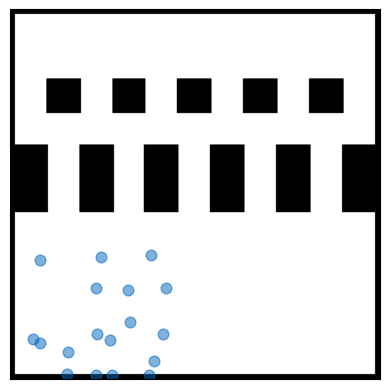

In [15]:
plt.switch_backend('inline')
from system.bio_model.place_cell_model import PlaceCell
from system.controller.local_controller.local_navigation import create_gc_spiking, setup_gc_network
from system.controller.reachability_estimator.data_generation.dataset import place_info
from system.controller.simulation.pybullet_environment import PybulletEnvironment

env = PybulletEnvironment('linear_sunburst', visualize=False, contains_robot=False)
gc_network = setup_gc_network(dt=env.dt)

for pos in clicks:
    angle = 0
    spiking = create_gc_spiking(start=(0, 0), goal=pos, gc_network_at_start=gc_network, plotting=False)
    data = place_info((pos, angle, spiking), env)
    pc = PlaceCell.from_data(data)
    cognitive_map.add_node_to_map(pc)
plot.plotTrajectoryInEnvironment(env_model='tmp', cognitive_map=cognitive_map, trajectory=False)

In [57]:
from system.controller.reachability_estimator.reachability_estimation import reachability_estimator_factory

re = reachability_estimator_factory('distance')
re.threshold_reachable = -1

from functools import wraps
import numpy as np
def _wrap(fun):
    @wraps(fun)
    def _wrapper(p1, p2):
        if np.linalg.norm(np.array(p1.pos) - np.array(p2.pos)) > 2:
            return False, 0
        return fun(p1, p2)
    return _wrapper
#re.get_reachability = _wrap(re.get_reachability)

add_connections_to_map(cognitive_map, re, add=True, remove=True)

deleting edge [1-0]: conn -1.12938831461649
deleting edge [2-0]: conn -1.4648009399841544
deleting edge [3-1]: conn -1.0129784082738942
deleting edge [3-2]: conn -1.496996269129589
deleting edge [4-3]: conn -1.0316207991891684
deleting edge [6-4]: conn -1.4653373661276194
deleting edge [6-5]: conn -1.1236910499463215
deleting edge [7-3]: conn -1.3623645361905
deleting edge [7-4]: conn -1.4324306477314641
deleting edge [8-5]: conn -1.2708372705138156
deleting edge [9-5]: conn -1.2474837662337663
deleting edge [9-6]: conn -1.0655967967270217
deleting edge [9-8]: conn -1.4770894549687392
deleting edge [11-4]: conn -1.046245506857456
deleting edge [11-6]: conn -1.364286066815695
deleting edge [12-4]: conn -1.3720884786910814
deleting edge [13-11]: conn -1.2957420068474894
deleting edge [14-1]: conn -1.4642643173235828
deleting edge [14-2]: conn -1.3277947121626739
deleting edge [14-3]: conn -1.2995272662607686
deleting edge [14-12]: conn -1.3211192286256035
deleting edge [14-13]: conn -1.0

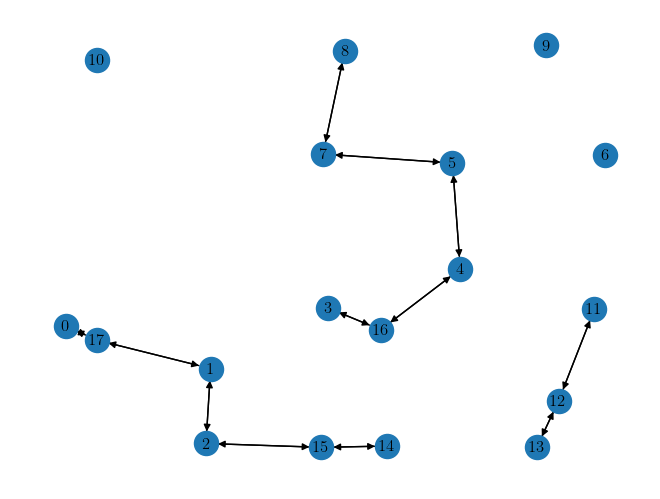

In [24]:
cognitive_map.draw()

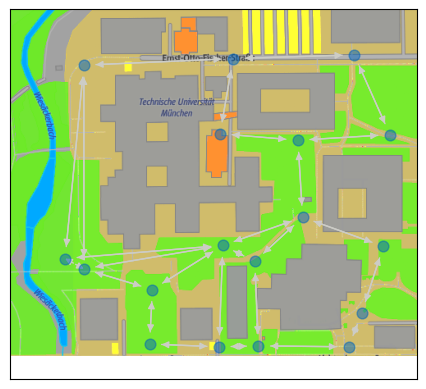

In [30]:
plot.plotTrajectoryInEnvironment(env_model='tmp', cognitive_map=cognitive_map, trajectory=False, with_labels=True)

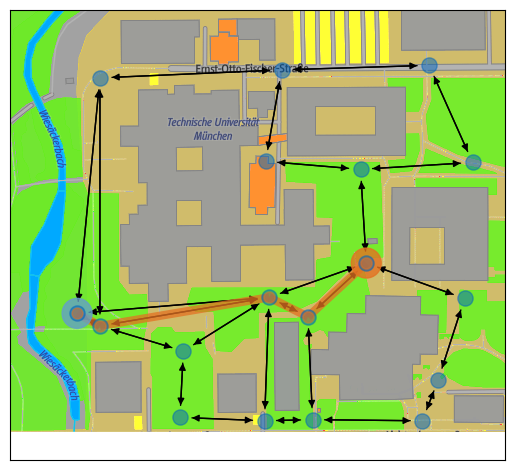

In [48]:
from system.plotting.plotHelper import TUM_colors, add_environment
import networkx as nx

env_model = "tmp"
fig, ax = plt.subplots()
add_environment(ax, env_model)

G = cognitive_map.node_network
pos = nx.get_node_attributes(G, 'pos')

nx.draw_networkx_edges(G, pos, edge_color='black', ax=ax)
nx.draw_networkx_nodes(G, pos, node_color='#0065BD80', node_size=120, ax=ax)

path = [0, 17, 3, 16, 4]
path = [pcs[i] for i in path]
start = path[0].pos; end = path[-1].pos
# draw_path
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='#E3722280', node_size=60, ax=ax)
G = G.to_undirected()
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='#E37222C0', width=6, ax=ax)

circle = plt.Circle((start[0], start[1]), 0.15, color=TUM_colors['TUMAccentBlue'], alpha=0.8)
ax.add_artist(circle)

circle = plt.Circle((end[0], end[1]), 0.15, color=TUM_colors['TUMAccentOrange'], alpha=0.8)
ax.add_artist(circle)
fig.tight_layout()
fig.savefig('/home/pierre/topological_map.png')

In [32]:
%psource plot.plotCognitiveMap

def plotCognitiveMap(
    ax, cognitive_map,
    path: list['PlaceCell']|None=None,
    with_labels = False,
    with_directions = False,
):
    G = cognitive_map.node_network
    pos = nx.get_node_attributes(G, 'pos')
    kwargs = {}
    nx.draw_networkx_edges(G, pos, edge_color='#CCCCC6', ax=ax)

    if with_directions:
        for node in G.nodes:
            pos, angle = node.pos, node.angle
            circle = plt.Circle(pos, 0.2, color=TUM_colors['TUMAccentBlue'], alpha=1)
            ax.add_artist(circle)
            arrow = plt.Arrow(pos[0], pos[1], math.cos(angle), math.sin(angle),
                              color=TUM_colors['TUMAccentBlue'], alpha=1)
            ax.add_artist(arrow)
    else:
        nx.draw_networkx_nodes(G, pos, node_color='#0065BD80', node_size=60, ax=ax, **kwargs)
        if with_labels:
            nx.draw_networkx_labels(G, pos, labels={j: str(i) for i, j in enumerate(G.nodes)})

    if path:
        # draw_path
        path_edges = list(zip(path, p

In [59]:
cognitive_map.save("linear_sunburst.handcrafted.gpickle")

# Cognitive map metrics

after_lifelong_learning.gpickle, coverage: 0.975, agreement: -0.0251734168717834
after_lifelong_learning.gpickle (121 nodes)


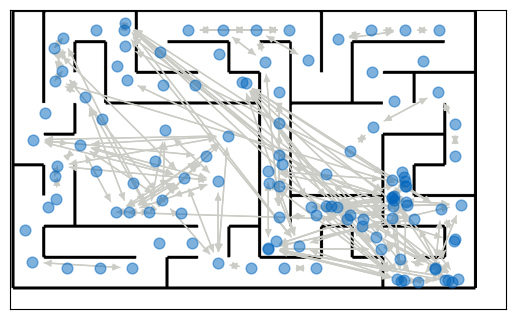

after_exploration.gpickle, coverage: 0.975, agreement: 0.0034186188779732
after_exploration.gpickle (83 nodes)


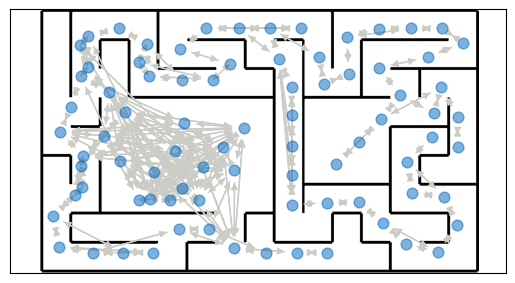

cognitive_map_full.gpickle, coverage: 0.2125, agreement: 0.0103731159428282
cognitive_map_full.gpickle (102 nodes)


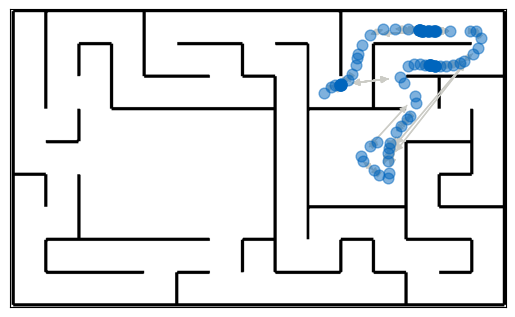

linear_sunburst.after_lifelong_learning.gpickle, coverage: 0.9634146341463414, agreement: 0.0108892921960072
linear_sunburst.after_lifelong_learning.gpickle (18 nodes)


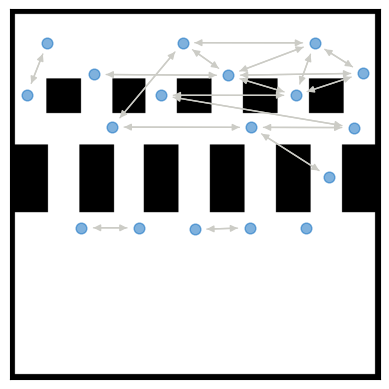

cognitive_map_partial_3.gpickle, coverage: 0.3125, agreement: 0.0192971246006389
cognitive_map_partial_3.gpickle (141 nodes)


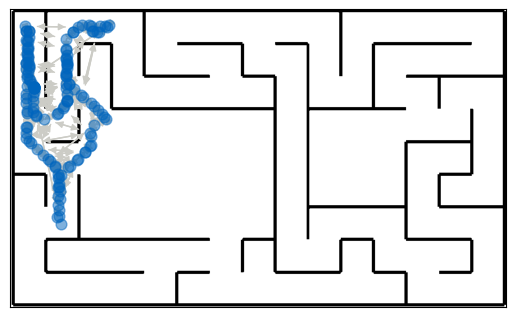

cognitive_map_partial.gpickle, coverage: 0.2625, agreement: 0.0240921079326435
cognitive_map_partial.gpickle (60 nodes)


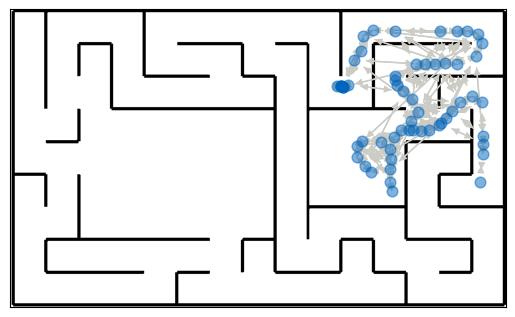

cognitive_map_partial_2.gpickle, coverage: 0.4375, agreement: 0.0572105138527111
cognitive_map_partial_2.gpickle (97 nodes)


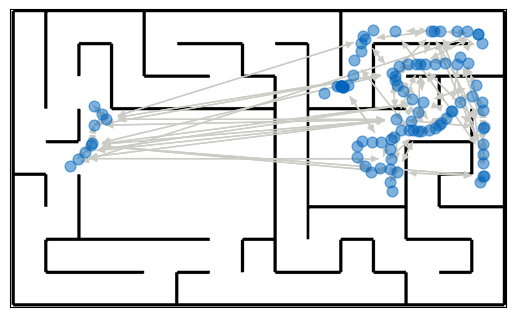

linear_sunburst.after_exploration.gpickle, coverage: 0.9634146341463414, agreement: nan
linear_sunburst.after_exploration.gpickle (18 nodes)


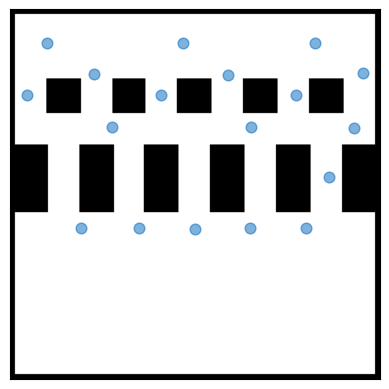

In [7]:
import pandas as pd
df = pd.read_csv('./eval_cogmap.py.log')
for line in df.sort_values(by='agreement').iterrows():
    line = line[1]
    filename = line['map_name']
    print(filename, f'coverage: {line["coverage"]}', f'agreement: {line["agreement"]}', sep=', ')
    match filename.split("."):
        case (env_model, _type, "gpickle"):
            draw_map(filename, env_model)
        case (type, "gpickle"):
            draw_map(filename, "Savinov_val3")